# ALE plot interaction with pyALE

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will create 2-feature ALE plots with the open-source Python library [pyALE](https://pypi.org/project/PyALE/) and some manual help.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from PyALE import ale

## Load data

In [2]:
# we'll just use the numerical variables to speed up the demo

variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
             'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'MoSold', 'YrSold', 'SalePrice']

# load dataset

data = pd.read_csv('../houseprice.csv', usecols=variables)

In [3]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

## Random Forest

In [4]:
# train model

rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=3,
    random_state=3,
).fit(X_train, y_train)

In [5]:
# R2 in train set

rf.score(X_train, y_train)

0.8111905087278761

In [6]:
# R2 in test set

rf.score(X_test, y_test)

0.7848537001494764

The model explains > 75% of the variability in the target.

## Feature importance

Let's determine the feature importance derived from the model.

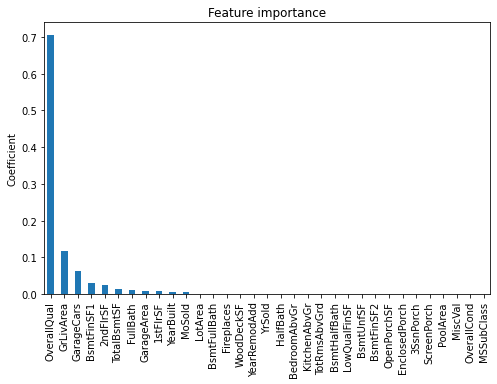

In [7]:
# put coefficients in a series

s = pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_,
)

# plot coefficients
s.sort_values(ascending=False).plot.bar(figsize=(8, 5))
plt.title("Feature importance")
plt.ylabel("Coefficient")
plt.show()

## 1-D ALE plot

PyALE._ALE_generic:INFO: Discrete feature detected.


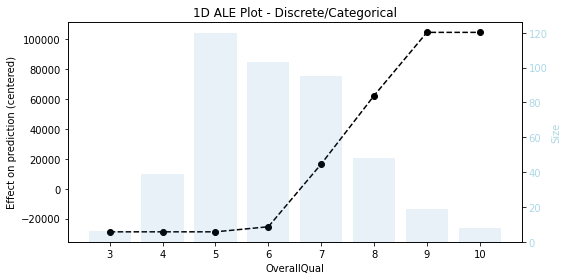

In [8]:
# 1D - continuous - no Confidence interval
ale_eff = ale(
    X=X_test, model=rf, feature=["OverallQual"], grid_size=10, include_CI=False
)

PyALE._ALE_generic:INFO: Continuous feature detected.


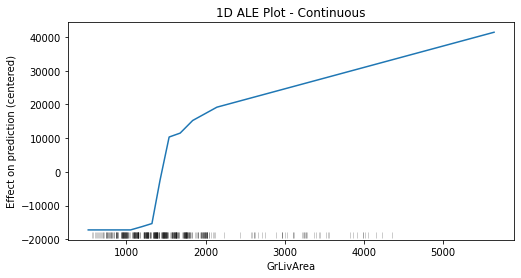

In [9]:
# Let's examine a less important feature

ale_eff = ale(
    X=X_test, model=rf, feature=["GrLivArea"], grid_size=10, include_CI=False,
)

PyALE._ALE_generic:INFO: Continuous feature detected.


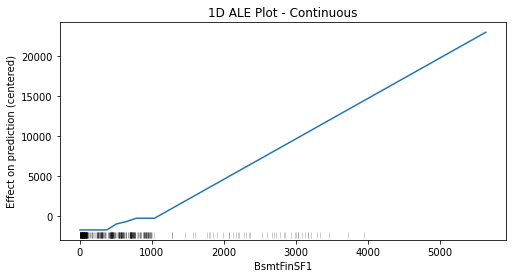

In [10]:
# 1D - continuous - no Confidence interval
ale_eff = ale(
    X=X_test, model=rf, feature=["BsmtFinSF1"], grid_size=10, include_CI=False
)

## 2-D ALE plot

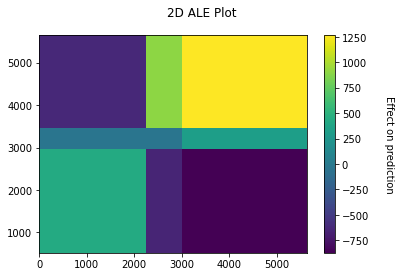

In [11]:
# the out of the box function does not work :/

## 2D - continuous

ale_eff = ale(
    X=X_test, 
    model=rf,
    feature=["GrLivArea", "BsmtFinSF1"], 
    grid_size=20,
)

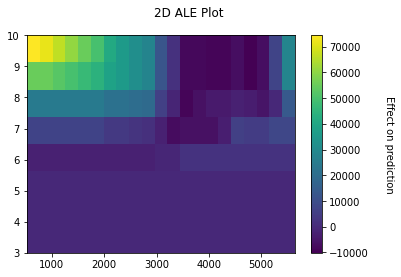

In [12]:
# the out of the box function does not work :/

## 2D - continuous

ale_eff = ale(
    X=X_test, 
    model=rf,
    feature=["OverallQual", "GrLivArea"], 
    grid_size=20,
)

The former plot does not display correctly with the current version of PyALE.

I fix it and made a PR.

If you can't see the above plot, there is a workaround:

In [13]:
# with this function we obtain the 2nd order effects

from PyALE._src.ALE_2D import aleplot_2D_continuous

In [14]:
import numpy as np

In [15]:
eff_grid = aleplot_2D_continuous(
    X=X_test, 
    model=rf, 
    features=["OverallQual", "GrLivArea"], 
    grid_size=20,
)

eff_grid

GrLivArea,520,858,907,988,1054,1118,1200,1250,1324,1365,...,1478,1541,1603,1680,1752,1838,1960,2144,2515,5642
OverallQual,,,,,,,,,,,,,,,,,,,,,
3,-371.751117,-371.751117,-371.751117,-371.751117,-371.751117,-371.751117,-300.986879,-300.986879,-300.986879,-300.986879,...,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879
4,-371.751117,-371.751117,-371.751117,-371.751117,-371.751117,-371.751117,-300.986879,-300.986879,-300.986879,-300.986879,...,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879
5,-371.751117,-371.751117,-371.751117,-371.751117,-371.751117,-371.751117,-300.986879,-300.986879,-300.986879,-300.986879,...,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879,-300.986879
6,-2341.011807,-2341.011807,-2341.011807,-2341.011807,-2341.011807,-2341.011807,-2270.247570,-2270.247570,-2270.247570,-2270.247570,...,-1061.881854,2151.439169,2151.439169,2151.439169,2151.439169,2151.439169,2151.439169,2151.439169,2151.439169,2151.439169
7,6934.840424,6934.840424,6934.840424,6934.840424,6934.840424,6934.840424,4033.506671,4033.506671,2685.426756,1618.737885,...,-7190.952927,-6330.067137,-6330.067137,-6330.067137,-2972.377501,5799.073523,4874.687274,4874.687274,7724.376527,7724.376527
8,24309.470989,24309.470989,24309.470989,24309.470989,24309.470989,24309.470989,21408.137237,21408.137237,20060.057321,18993.368450,...,-1365.832050,-9004.451131,-6262.598694,-4018.576671,-4018.576671,-2255.912469,-3506.239542,-5322.524002,-256.021305,13575.570206
9,55157.220728,55157.220728,52415.368291,49673.515854,46931.663417,44189.810980,38546.624790,35804.772353,31714.840000,27906.298692,...,2063.393317,-8317.078200,-8317.078200,-8814.908615,-8814.908615,-7052.244412,-10122.903544,-6857.140636,7175.825393,28176.794682
10,74350.187788,71608.335351,66124.630477,60640.925602,55157.220728,49673.515854,41288.477227,35804.772353,31714.840000,27906.298692,...,2063.393317,-8317.078200,-8317.078200,-8814.908615,-8814.908615,-7052.244412,-10122.903544,-6857.140636,7175.825393,28176.794682


Text(0, 0.5, 'OverallQual')

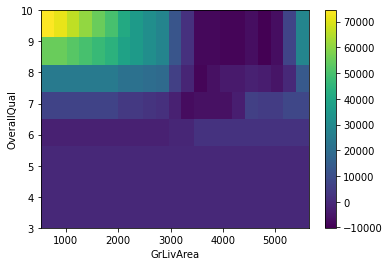

In [16]:
X, Y = np.meshgrid(eff_grid.columns, eff_grid.index)
fig, ax = plt.subplots()
im = ax.imshow(
    eff_grid, 
    origin="lower", 
    extent=[X.min(), X.max(), Y.min(), Y.max()],
    aspect='auto',
)
cbar = fig.colorbar(im, ax=ax)
ax.set_xlabel(eff_grid.columns.name)
ax.set_ylabel(eff_grid.index.name)

Text(0, 0.5, 'GrLivArea')

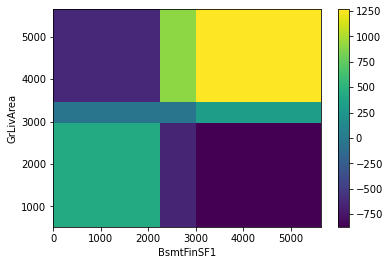

In [17]:
eff_grid = aleplot_2D_continuous(
    X=X_test, 
    model=rf, 
    features=["GrLivArea", "BsmtFinSF1"], 
    grid_size=20,
)

X, Y = np.meshgrid(eff_grid.columns, eff_grid.index)
fig, ax = plt.subplots()
im = ax.imshow(
    eff_grid, 
    origin="lower", 
    extent=[X.min(), X.max(), Y.min(), Y.max()],
    aspect='auto',
)
cbar = fig.colorbar(im, ax=ax)
ax.set_xlabel(eff_grid.columns.name)
ax.set_ylabel(eff_grid.index.name)